<a href="https://colab.research.google.com/github/Vmalik1995/Factor-Analysis/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
!pip install plotly seaborn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 75.5 MB/s eta 0:00:00


In [ ]:
##Importing the Libraries that we will use in the project to clean, process and visualize the information

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [ ]:
import opendatasets as od

Downloading the house price data set from kaggle

In [ ]:
prices_url = 'https://www.kaggle.com/datasets/faryarmemon/usa-housing-market-factors?select=Annual_Macroeconomic_Factors.csv'

In [ ]:
od.download(prices_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaibhavmalik2795
Your Kaggle Key: ··········


100%|██████████| 32.2k/32.2k [00:00<00:00, 19.7MB/s]

In [ ]:
!ls -lh usa-housing-market-factors

total 80K
-rw-r--r-- 1 root root 3.8K May  9 03:45  Annual_Macroeconomic_Factors.csv
-rw-r--r-- 1 root root  41K May  9 03:45 'Housing_Macroeconomic_Factors_US (2).csv'
-rw-r--r-- 1 root root  31K May  9 03:45  Monthly_Macroeconomic_Factors.csv


In [ ]:
prices_csv = 'usa-housing-market-factors/Annual_Macroeconomic_Factors.csv'

In [ ]:
prices_df = pd.read_csv(prices_csv)

In [ ]:
prices_df.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0


In [ ]:
prices_df

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0
5,1980-01-01,102.6675,100.00000,100.00000,0.95959,7.14167,6763.514,13.74212,21584.0
6,1981-01-01,107.2375,108.67516,110.33472,0.98142,7.60000,6935.153,16.64151,21891.0
7,1982-01-01,108.4600,101.20645,117.09981,0.95332,9.70833,6810.120,16.04365,22156.0
8,1983-01-01,116.2425,136.01719,120.86156,0.91438,9.61667,7122.290,13.23538,22714.0
9,1984-01-01,121.4575,135.71240,126.05926,0.86582,7.52500,7637.704,13.87769,24062.0


In [ ]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    47 non-null     object 
 1   House_Price_Index       47 non-null     float64
 2   Stock_Price_Index       47 non-null     float64
 3   Consumer_Price_Index    47 non-null     float64
 4   Population              47 non-null     float64
 5   Unemployment_Rate       47 non-null     float64
 6   Real_GDP                47 non-null     float64
 7   Mortgage_Rate           47 non-null     float64
 8   Real_Disposable_Income  47 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.4+ KB


In [ ]:
prices_df.describe()

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,240.145585,743.127265,198.587797,0.935152,6.310108,12140.355319,7.781053,32040.936170
std,120.405988,588.510811,75.577467,0.231639,1.623767,4243.074608,3.409098,8006.301392
min,61.090000,67.146530,65.304880,0.118380,3.666670,5648.462000,2.957690,19908.000000
25%,140.788750,209.898725,135.443420,0.862650,5.166670,8374.041000,4.863175,25432.500000
50%,211.462500,756.555290,197.805640,0.945870,5.991670,12045.824000,7.440000,31712.000000
75%,339.353750,1114.174615,262.933360,1.081575,7.441665,15645.976500,9.885575,38235.000000
max,523.260000,2255.843700,328.813530,1.386890,9.708330,19427.287000,16.641510,48219.000000


In [ ]:
 correlation =  prices_df.corr()

<ipython-input-14-00c73f11da44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =  prices_df.corr()


In [ ]:
correlation

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
House_Price_Index,1.000000,0.969546,0.969244,-0.615552,-0.339527,0.980220,-0.834767,0.986553
Stock_Price_Index,0.969546,1.000000,0.950569,-0.656950,-0.393546,0.971103,-0.842434,0.973682
Consumer_Price_Index,0.969244,0.950569,1.000000,-0.551374,-0.306713,0.991167,-0.852521,0.988868
Population,-0.615552,-0.656950,-0.551374,1.000000,0.067934,-0.587978,0.422529,-0.596869
Unemployment_Rate,-0.339527,-0.393546,-0.306713,0.067934,1.000000,-0.354710,0.316395,-0.335303
Real_GDP,0.980220,0.971103,0.991167,-0.587978,-0.354710,1.000000,-0.878215,0.995385
Mortgage_Rate,-0.834767,-0.842434,-0.852521,0.422529,0.316395,-0.878215,1.000000,-0.873526
Real_Disposable_Income,0.986553,0.973682,0.988868,-0.596869,-0.335303,0.995385,-0.873526,1.000000


<Axes: >

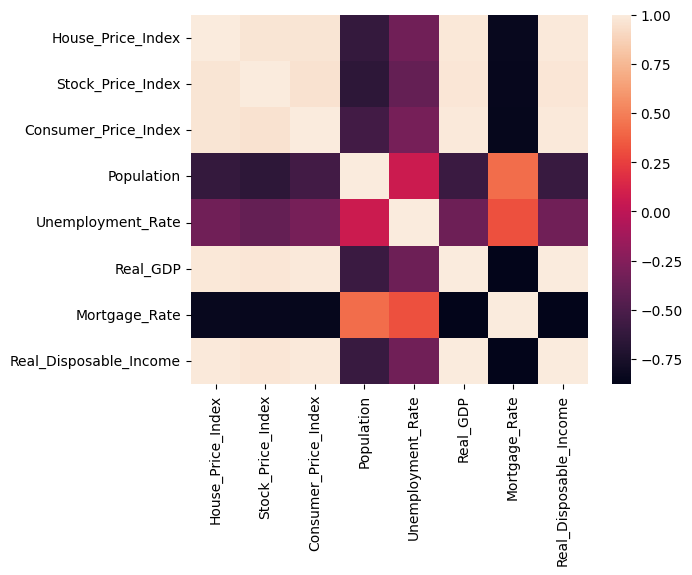

In [ ]:
sns.heatmap(correlation)

* So the above heatmap gives us the insight that the stock prices, which comes into the category of economy along with the GDP has a high impact
* Demographic factor here is the population which also has  a strong correlation with the prices of the house as recorded on the first of january for last 46 years.
* Employment factors also have the strong effect on the pricing index as seen from the graph.
* Also we can see that the prices of the property has been increased since then.

In [ ]:
fig = px.bar(prices_df,
             title = 'Prices with respect to date sice 1975',
             x='Date',
             y='House_Price_Index');
fig.show()

* We can say that there is a linear growth pattern within the time frame of data capturing.

In [ ]:
fig = px.line(prices_df,
              x='Date',
              y=['Real_Disposable_Income','Mortgage_Rate'],
              title='Income vs Mortgage rate comparison');
fig.show()

* As the graph says that the income grew steadily, this leads to the fact that affordabiity and purchasing power increased. Also we can see that ,mortgage here is constant , so lending was mostly steady.

In [ ]:
fig = px.line(prices_df,
             x='Date',
              y='Mortgage_Rate',
              title ='Motgage rate with time');
fig.show()

* This is a insight that the mortgage rate is getting lower compared to what was in the early stages, when the projects started, so this means that the income increased and people tend to ceased taking loans.

In [ ]:
fig = px.line(prices_df,
              x= 'Date',
              y= ['Unemployment_Rate','Mortgage_Rate'],
              title ='Comparison of Unemployment Rate and GDP')
fig.show()

* So we can see that both the unemployment rate and mortgage rate is directly related to each other.
* Also the higher the unemployment rate is higher  will be the mortgage rate.

In [ ]:
fig = px.bar(prices_df,
             barmode= 'group',
             x='Date',
             y=['Real_GDP','Real_Disposable_Income'],
             title = 'Real GDP vs Real Income')
fig.show()

* The direct relationship between both can be seen here, with the growing time the gdp as well as the income will grow.


## Monthly Analysis

In [ ]:
 monthly_csv = 'usa-housing-market-factors/Housing_Macroeconomic_Factors_US (2).csv'

In [ ]:
monthly_df = pd.read_csv(monthly_csv)

In [ ]:
monthly_df

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.000,2.7439,100.46240,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.400,2.7475,100.49450,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.700,2.7537,100.57200,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.100,2.7677,100.65680,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.300,2.7729,100.69190,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2022-01-01,284.767,332684,5.7,100.091744,3.4450,70.748899,1841.0,294.807,21.6593,97.49467,2.13,NaN
421,2022-02-01,290.371,332750,6.0,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,2.13,NaN
422,2022-03-01,296.496,332812,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,2022-04-01,301.704,332863,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mean_population = np.mean(monthly_df.population)

In [ ]:
mean_population

291988.25176470587

In [ ]:
avg_mortgage_rate = np.mean(monthly_df.mortgage_rate)
avg_mortgage_rate

6.328300947867299

In [ ]:
monthly_correlation = monthly_df.corr()

<ipython-input-38-a7622ddf5d38>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

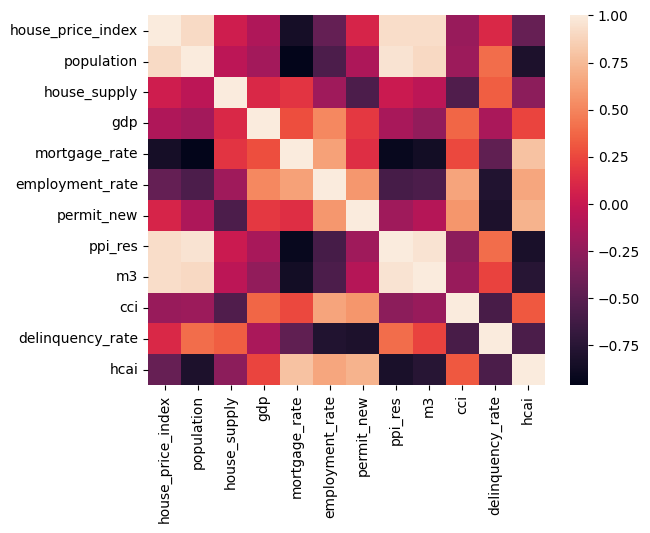

In [ ]:
sns.heatmap(monthly_correlation)

## Monthly employment rate, Mortgage rate comparison

In [ ]:
fig = px.line(monthly_df,
              x= 'Date',
              y= ['employment_rate','mortgage_rate'],
              title = 'Monthly Employment rate, mortgage rate comparison')
fig.show()

This shows that the monthly rate of employment and mortgage is constant(almost), if individually interpreted then the mortgage rate is downfalling while the employment rate is still constant

In [ ]:
fig = px.line(monthly_df,
              x= 'Date',
              y= ['house_price_index','gdp'],
              title = 'Monthly Employment rate, mortgage rate comparison')
fig.show()

This tells us volumes that over the month the house price index grew, the demand was high the purchasing power was good the, people out there were getting good income , while the GDP was still at a constant every month.

In [ ]:
fig = px.line(monthly_df,
              x= 'Date',
              y= ['house_supply','mortgage_rate'],
              title = 'Monthly Employment rate, mortgage rate comparison')
fig.show()

## Monthly delinquency rate, mortgage rate comparison

In [ ]:
fig = px.line(monthly_df,
              x= 'Date',
              y= ['delinquency_rate','mortgage_rate'],
              title = 'Monthly Delinquency rate, mortgage rate comparison')
fig.show()

* The delinquency rate is the one where the people fail to give the emi for their loans or installments, the above data shows that the delinquency rate was declining excet where it was a slowdown when USA was at the conflict with Taliban, ISIS in the 2010-2019 time frame.

## Monthy House Supply

In [ ]:
fig = px.bar(monthly_df,
             x='Date',
             y= 'house_supply')
fig.show()

The house supply show the ups and downs, like there was a demand but supply was less, as seen by the peaks which often comes at a interval of 2-3 years

In [ ]:
housing_csv = 'usa-housing-market-factors/Monthly_Macroeconomic_Factors.csv'

In [ ]:
housing_df = pd.read_csv(housing_csv)

In [ ]:
housing_df

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5
1,1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1
2,1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0
3,1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2
4,1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1
...,...,...,...,...,...,...,...,...,...
418,2021-11-01,276.092,159.94283,117.26923,205122000.0,4.2,6.97022,3.0675,15470.8
419,2021-12-01,278.681,157.33822,117.62954,205119000.0,3.9,-1.19019,3.0980,15442.7
420,2022-01-01,282.060,158.10031,118.61934,207397000.0,4.0,-6.00027,3.4450,15163.5
421,2022-02-01,287.307,155.27345,119.70281,207396000.0,3.8,-2.29249,3.7625,15173.6


In [ ]:
housing_corr = housing_df.corr()

<ipython-input-44-b5f789742919>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

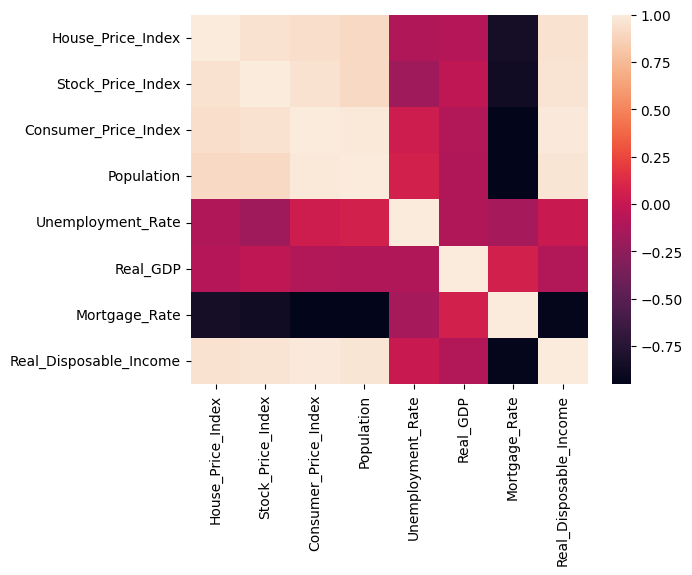

In [ ]:
sns.heatmap(housing_corr)

WE can see here that maximum factors are having a strong correlation with the data istself. 